![alt text](image.png)

In [ ]:
m = 1 # kg
theta = 15 # degrees
l = 0.5 # m
g = 9.81 # m/s^2
time = 0 # seconds


import math
def calculate_tension(m, theta, l, g):
    theta_rad = math.radians(theta)
    T = m * g / (math.cos(theta_rad) + (m * g * math.sin(theta_rad)) / (m * g))
    return T

T = calculate_tension(m, theta, l, g)
print(f"The tension in the string is: {T:.2f} N")
def calculate_velocity(m, theta, l, g):
    theta_rad = math.radians(theta)
    v = math.sqrt(g * l * (math.sin(theta_rad) + (m * g * math.cos(theta_rad)) / (m * g)))
    return v

v = calculate_velocity(m, theta, l, g)
print(f"The velocity of the mass is: {v:.2f} m/s")
def calculate_acceleration(m, theta, l, g):
    theta_rad = math.radians(theta)
    a = g * (math.sin(theta_rad) + (m * g * math.cos(theta_rad)) / (m * g))
    return a
a = calculate_acceleration(m, theta, l, g)
print(f"The acceleration of the mass is: {a:.2f} m/s^2")
def calculate_period(m, theta, l, g):
    theta_rad = math.radians(theta)
    T_period = 2 * math.pi * math.sqrt(l / (g * (math.sin(theta_rad) + (m * g * math.cos(theta_rad)) / (m * g))))
    return T_period
T_period = calculate_period(m, theta, l, g)
print(f"The period of the motion is: {T_period:.2f} s")
def calculate_energy(m, theta, l, g):
    theta_rad = math.radians(theta)
    potential_energy = m * g * l * (1 - math.cos(theta_rad))
    kinetic_energy = 0.5 * m * (g * l * math.sin(theta_rad))**2
    total_energy = potential_energy + kinetic_energy
    return total_energy
total_energy = calculate_energy(m, theta, l, g)
print(f"The total mechanical energy is: {total_energy:.2f} J")


The tension in the string is: 8.01 N
The velocity of the mass is: 2.45 m/s
The acceleration of the mass is: 12.01 m/s^2
The period of the motion is: 1.28 s
The total mechanical energy is: 0.97 J


# Solución con qiskit


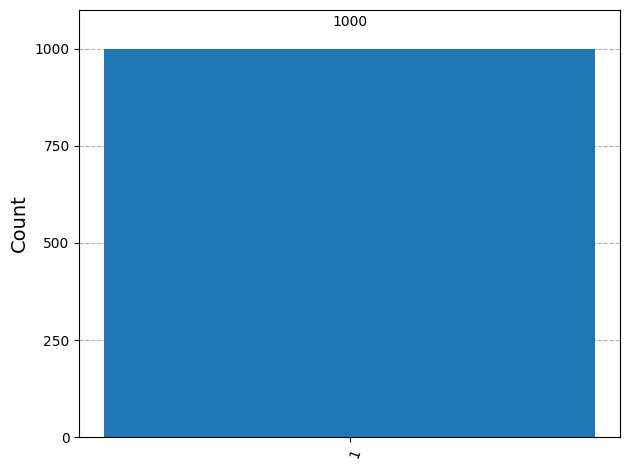

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Start simulator

simulator = AerSimulator()
# Encode |0> as logical 0: |000>
qc = QuantumCircuit(3, 1)
qc.barrier()

# Simulate a bit-flip error on the second qubit (pendulum perturbed)
qc.x(1)
qc.barrier()

# Error correction: majority vote (bit-flip code)
qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,2)
qc.barrier()

# Decode: measure the majority vote
qc.measure(2, 0)

qc.draw('mpl',reverse_bits=True)

In [ ]:

# Simulate

job = simulator.run(qc, shots=1000)
result = job.result().get_counts(qc)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)